<a href="https://colab.research.google.com/github/MCF-tech/CNN_pub/blob/main/site/en/tutorials/keras/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

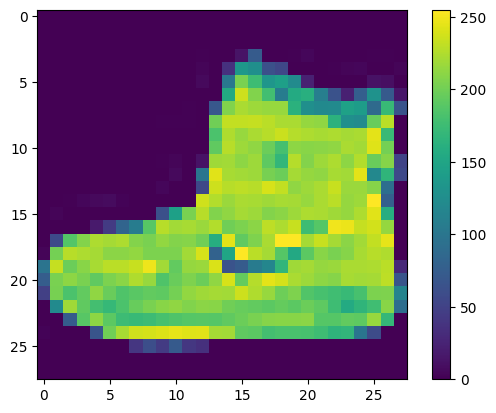

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

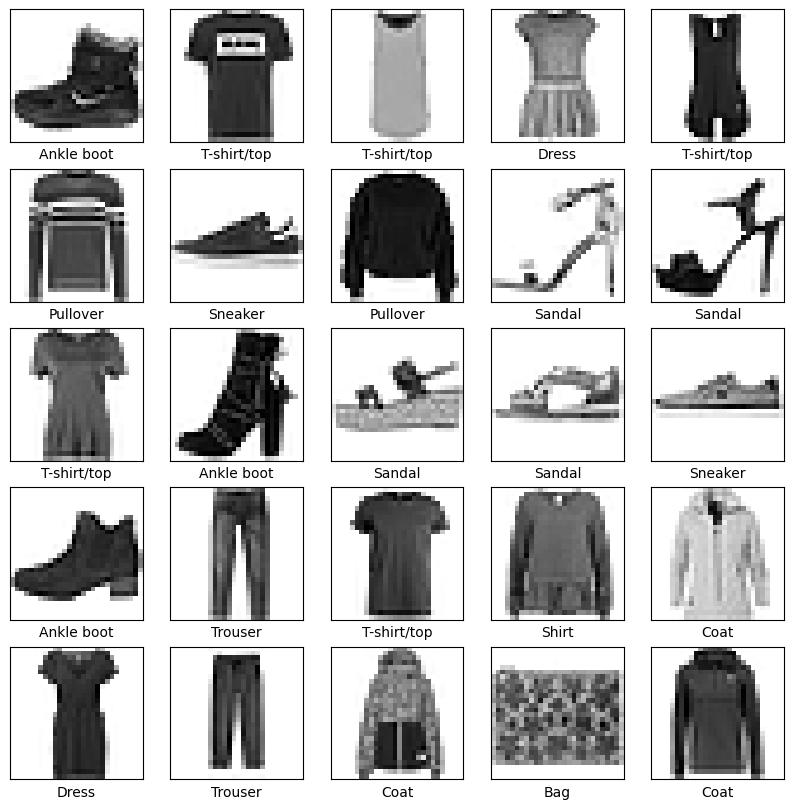

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7847 - loss: 0.6211
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8604 - loss: 0.3843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8762 - loss: 0.3354
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8857 - loss: 0.3150
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8929 - loss: 0.2920
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8962 - loss: 0.2806
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9030 - loss: 0.2640
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9062 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9086 - loss: 0.2457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9131 - loss: 0.2338


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8818 - loss: 0.3416

Test accuracy: 0.8817999958992004


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [20]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [22]:
predictions[0]

array([1.7846459e-08, 5.3547572e-10, 2.0739050e-08, 6.9476677e-12,
       4.9166610e-10, 3.6321708e-04, 5.5043802e-07, 5.1310826e-03,
       1.9914898e-08, 9.9450523e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [23]:
np.argmax(predictions[0])

np.int64(9)

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [24]:
test_labels[0]

np.uint8(9)

Define functions to graph the full set of 10 class predictions.

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

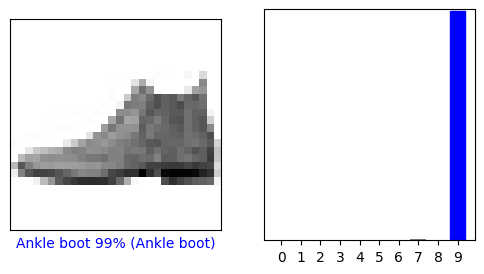

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

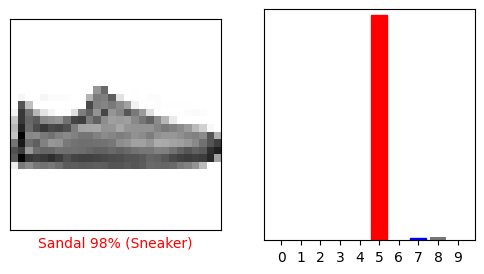

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

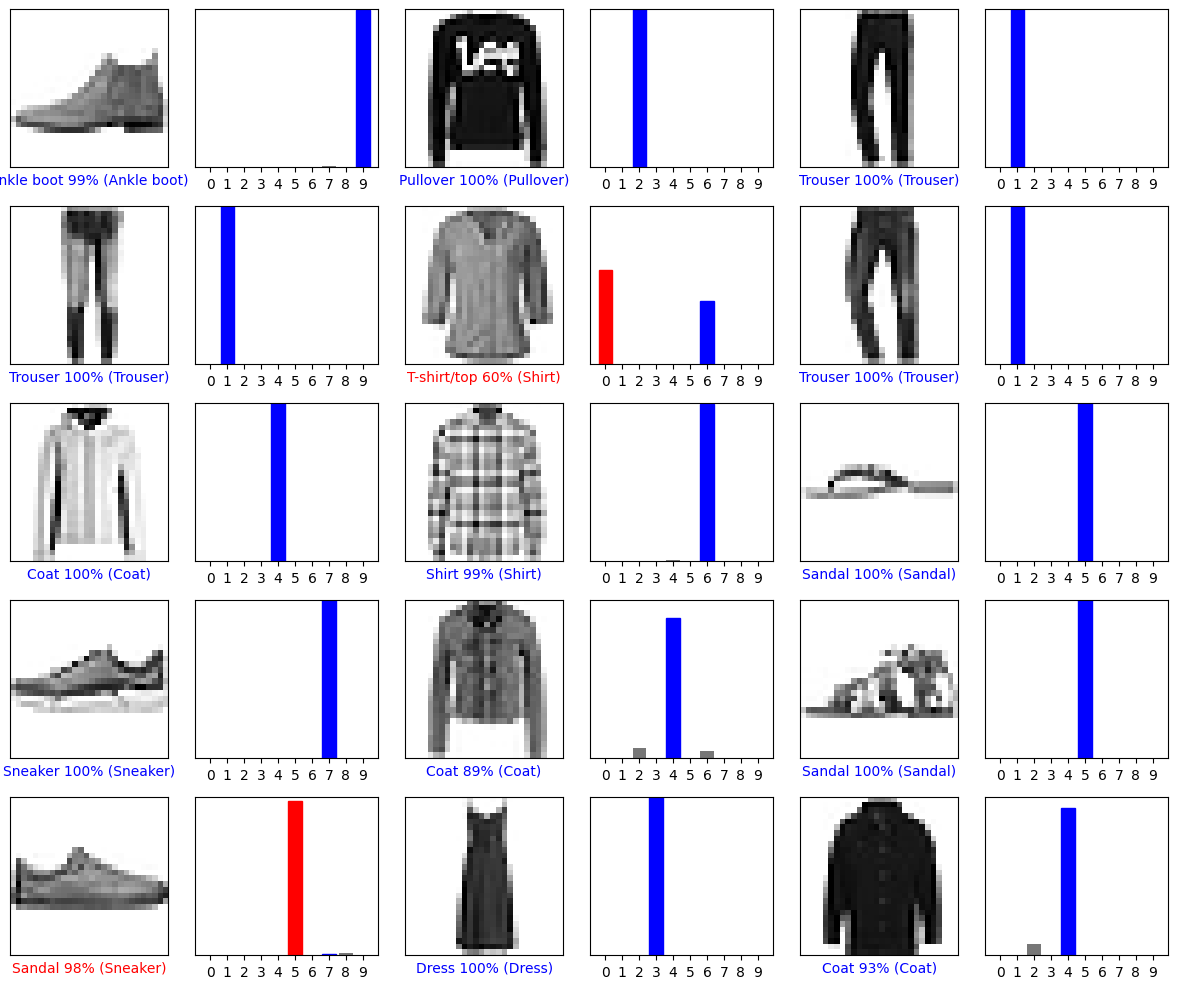

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [30]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [31]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[7.0887101e-05 2.1281358e-15 9.9880791e-01 5.1672773e-09 6.1010465e-04
  1.9867683e-15 5.1110826e-04 1.6807442e-19 2.6333424e-10 2.3688679e-16]]


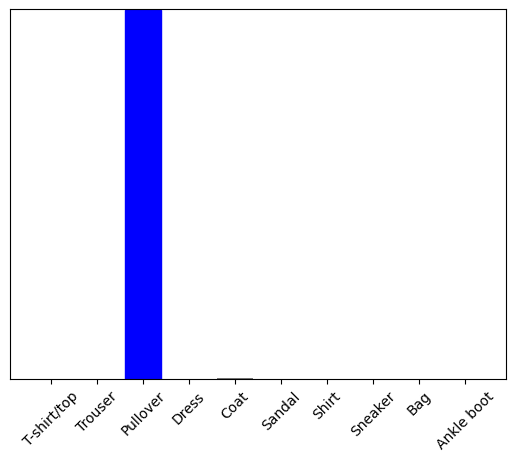

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [33]:
np.argmax(predictions_single[0])

np.int64(2)

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).

# Neuer Abschnitt

New code to test the effect of increasing the number of hidden layers/units on the model performance.

# Building and training the model:

In [34]:
def build_and_train_model(num_hidden_layers, units_per_layer, train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains a neural network model with specified architecture."""

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units_per_layer, activation='relu'))

    model.add(tf.keras.layers.Dense(10))

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

    return history, test_loss, test_acc

This function takes the number of hidden layers, units per layer, data, and epochs as input, builds the model, trains it, and returns the training history, test loss, and test accuracy.

Next, we'll create a loop to experiment with different architectures and store the results. Add another new code cell:

In [35]:
results = {}

# Experiment with different configurations
configurations = [
    {"num_hidden_layers": 1, "units_per_layer": 128},  # Original configuration
    {"num_hidden_layers": 2, "units_per_layer": 128},
    {"num_hidden_layers": 1, "units_per_layer": 256},
    {"num_hidden_layers": 2, "units_per_layer": 256},
    {"num_hidden_layers": 3, "units_per_layer": 128},
    {"num_hidden_layers": 3, "units_per_layer": 256},
]

for config in configurations:
    num_layers = config["num_hidden_layers"]
    units = config["units_per_layer"]
    print(f"Training with {num_layers} hidden layers and {units} units per layer...")

    history, test_loss, test_acc = build_and_train_model(
        num_layers, units, train_images, train_labels, test_images, test_labels, epochs=10
    )

    results[f"Layers: {num_layers}, Units: {units}"] = {
        "history": history,
        "test_loss": test_loss,
        "test_acc": test_acc,
    }

    print(f"Test accuracy: {test_acc}\n")

Training with 1 hidden layers and 128 units per layer...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test accuracy: 0.8828999996185303

Training with 2 hidden layers and 128 units per layer...
Test accuracy: 0.8726999759674072

Training with 1 hidden layers and 256 units per layer...
Test accuracy: 0.8826000094413757

Training with 2 hidden layers and 256 units per layer...
Test accuracy: 0.8817999958992004

Training with 3 hidden layers and 128 units per layer...
Test accuracy: 0.8810999989509583

Training with 3 hidden layers and 256 units per layer...
Test accuracy: 0.8884000182151794



This code defines a list of configurations to try. For each configuration, it calls the build_and_train_model function and stores the results in a dictionary.

Finally, let's add code to plot the results. Add another new code cell:


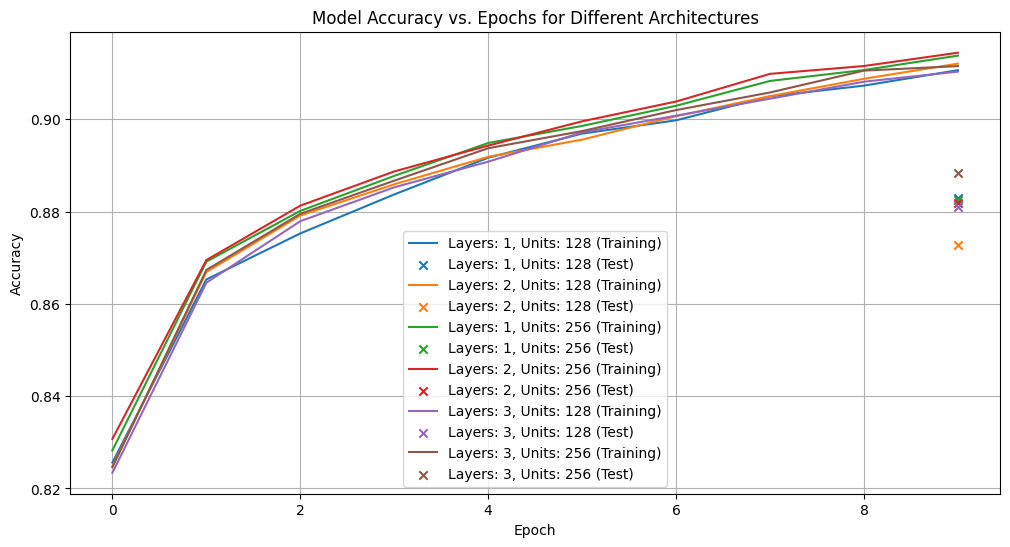

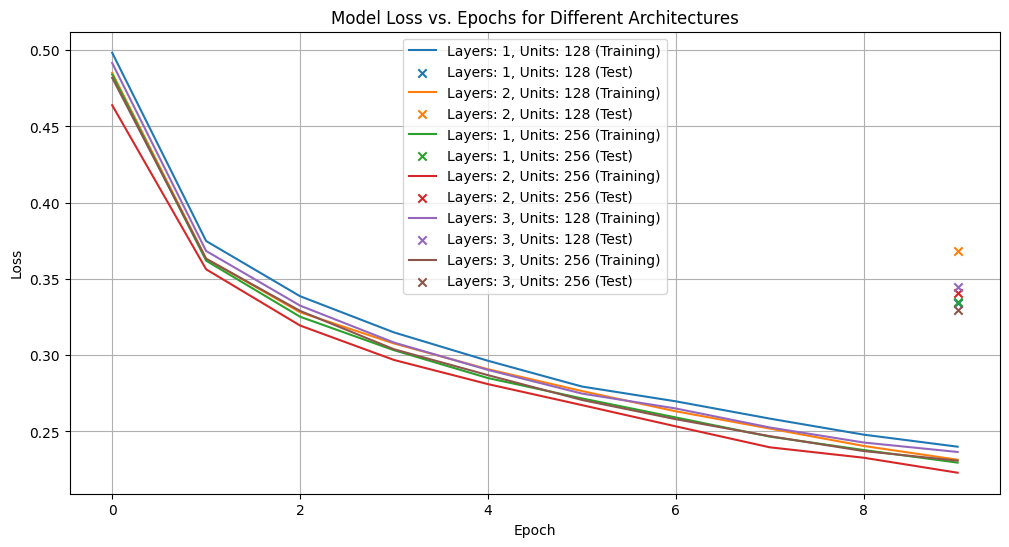

In [36]:
plt.figure(figsize=(12, 6))

for config_name, data in results.items():
    history = data["history"]
    plt.plot(history.history['accuracy'], label=f'{config_name} (Training)')
    plt.scatter(9, data["test_acc"], label=f'{config_name} (Test)', marker='x') # Mark test accuracy at last epoch

plt.title('Model Accuracy vs. Epochs for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

for config_name, data in results.items():
    history = data["history"]
    plt.plot(history.history['loss'], label=f'{config_name} (Training)')
    plt.scatter(9, data["test_loss"], label=f'{config_name} (Test)', marker='x') # Mark test loss at last epoch

plt.title('Model Loss vs. Epochs for Different Architectures')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# original model without and with dropout layers:

In [37]:
def build_and_train_original_model(train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains the original neural network model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return history, test_loss, test_acc

Now, let's define the function for the model with dropout layers and a dropout rate of 0.2:

In [38]:
def build_and_train_model_with_dropout(dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains a neural network model with dropout layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout layer after the first Dense layer
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return history, test_loss, test_acc

In this function, tf.keras.layers.Dropout(dropout_rate) is added after the first Dense layer. You can adjust the dropout_rate (e.g., 0.2 for 20% dropout) to experiment with different dropout levels.

Next, let's train both models and store their results. Add another new code cell:


In [39]:
results_comparison = {}

# Train the original model
print("Training the original model...")
history_original, test_loss_original, test_acc_original = build_and_train_original_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_comparison["Original Model"] = {
    "history": history_original,
    "test_loss": test_loss_original,
    "test_acc": test_acc_original,
}
print(f"Original Model Test Accuracy: {test_acc_original}\n")

# Train the model with dropout
dropout_rate = 0.2  # You can change this value
print(f"Training model with dropout (rate={dropout_rate})...")
history_dropout, test_loss_dropout, test_acc_dropout = build_and_train_model_with_dropout(
    dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10
)
results_comparison[f"Model with Dropout (rate={dropout_rate})"] = {
    "history": history_dropout,
    "test_loss": test_loss_dropout,
    "test_acc": test_acc_dropout,
}
print(f"Model with Dropout Test Accuracy: {test_acc_dropout}\n")

Training the original model...
Original Model Test Accuracy: 0.8812999725341797

Training model with dropout (rate=0.2)...
Model with Dropout Test Accuracy: 0.8784000277519226



This code will train both models and store their histories, test losses, and test accuracies in the results_comparison dictionary.

Finally, let's plot the results for comparison. Add the last new code cell:


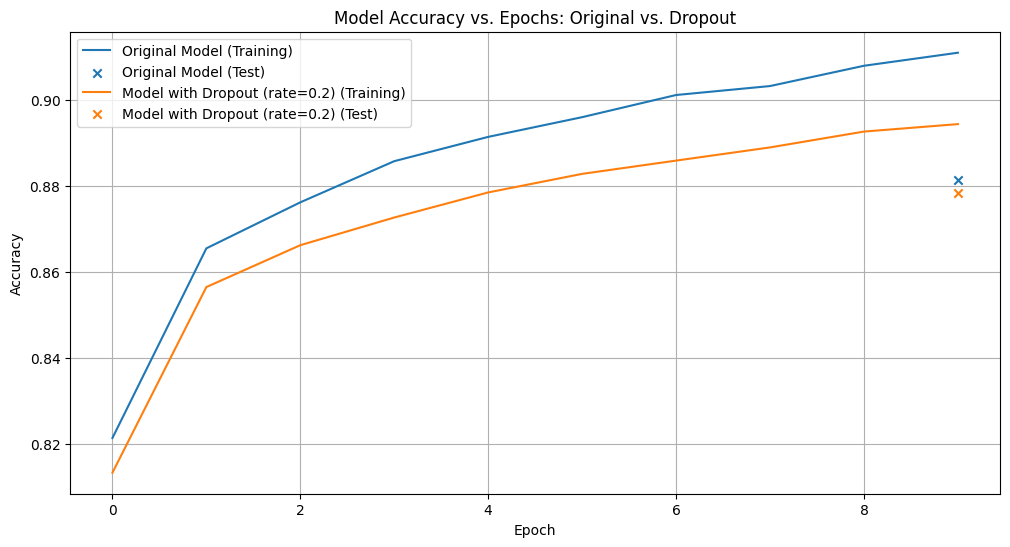

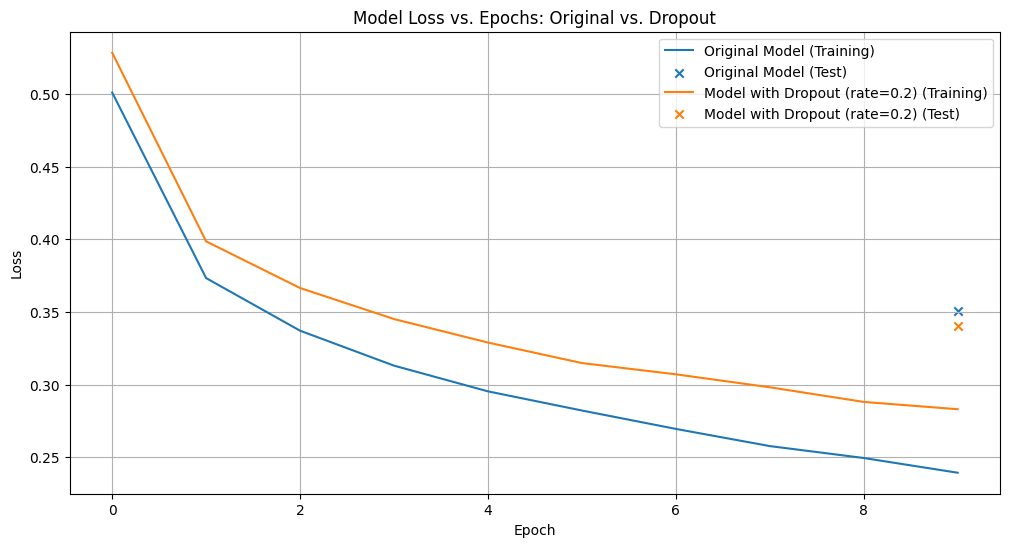

In [40]:
plt.figure(figsize=(12, 6))

for model_name, data in results_comparison.items():
    history = data["history"]
    plt.plot(history.history['accuracy'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_acc"], label=f'{model_name} (Test)', marker='x') # Mark test accuracy at last epoch

plt.title('Model Accuracy vs. Epochs: Original vs. Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

for model_name, data in results_comparison.items():
    history = data["history"]
    plt.plot(history.history['loss'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_loss"], label=f'{model_name} (Test)', marker='x') # Mark test loss at last epoch

plt.title('Model Loss vs. Epochs: Original vs. Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Complex model (3 hidden layers with 256 units each) without and with dropout layers:

Complex model without dropout:

In [41]:
def build_and_train_complex_model(train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains the complex neural network model (3 layers, 256 units)."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return history, test_loss, test_acc

Function for the complex model with dropout layers. We can add dropout after each hidden layer:

In [42]:
def build_and_train_complex_model_with_dropout(dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains the complex neural network model with dropout layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout after first hidden layer
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout after second hidden layer
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout after third hidden layer
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return history, test_loss, test_acc

In this function, tf.keras.layers.Dropout(dropout_rate) is added after each of the three hidden layers. You can experiment with different dropout_rate values.

Next, let's train both complex models and store their results:

In [43]:
results_complex_comparison = {}

# Train the complex model without dropout
print("Training the complex model without dropout...")
history_complex_original, test_loss_complex_original, test_acc_complex_original = build_and_train_complex_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_complex_comparison["Complex Model (No Dropout)"] = {
    "history": history_complex_original,
    "test_loss": test_loss_complex_original,
    "test_acc": test_acc_complex_original,
}
print(f"Complex Model (No Dropout) Test Accuracy: {test_acc_complex_original}\n")

# Train the complex model with dropout
dropout_rate = 0.3  # You can change this value
print(f"Training complex model with dropout (rate={dropout_rate})...")
history_complex_dropout, test_loss_complex_dropout, test_acc_complex_dropout = build_and_train_complex_model_with_dropout(
    dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10
)
results_complex_comparison[f"Complex Model with Dropout (rate={dropout_rate})"] = {
    "history": history_complex_dropout,
    "test_loss": test_loss_complex_dropout,
    "test_acc": test_acc_complex_dropout,
}
print(f"Complex Model with Dropout Test Accuracy: {test_acc_complex_dropout}\n")

Training the complex model without dropout...
Complex Model (No Dropout) Test Accuracy: 0.881600022315979

Training complex model with dropout (rate=0.3)...
Complex Model with Dropout Test Accuracy: 0.8723999857902527



This code will train both the complex model without dropout and the complex model with dropout and store their results. I've set a dropout_rate of 0.3 as a starting point, but you should definitely experiment with different values.

Finally, let's plot the results for comparison. Add the last new code cell:


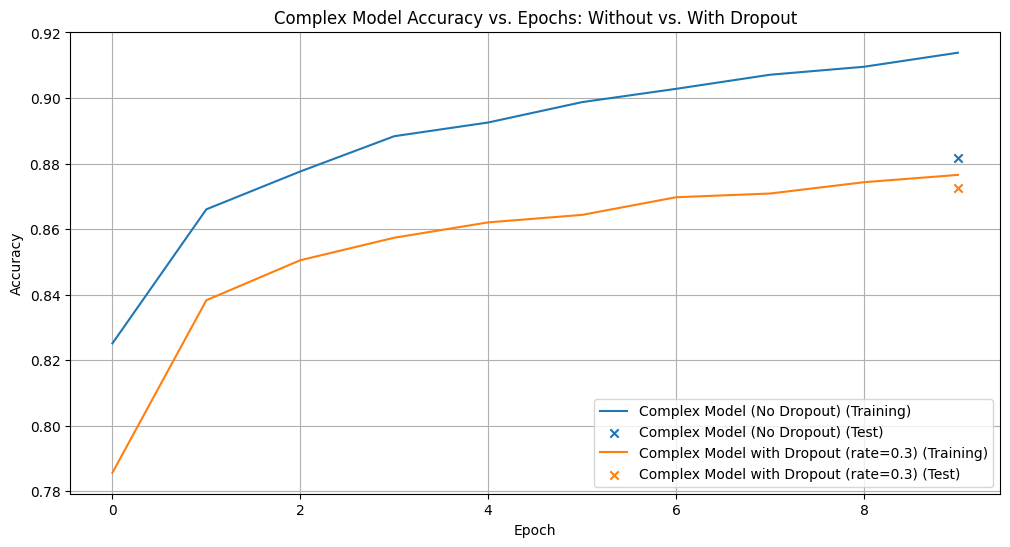

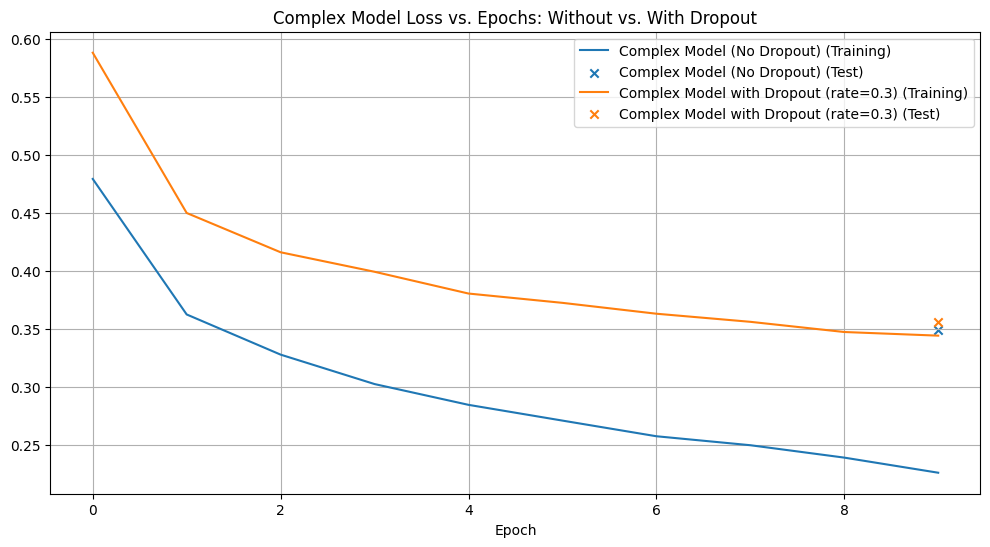

In [44]:
plt.figure(figsize=(12, 6))

for model_name, data in results_complex_comparison.items():
    history = data["history"]
    plt.plot(history.history['accuracy'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_acc"], label=f'{model_name} (Test)', marker='x') # Mark test accuracy at last epoch

plt.title('Complex Model Accuracy vs. Epochs: Without vs. With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

for model_name, data in results_complex_comparison.items():
    history = data["history"]
    plt.plot(history.history['loss'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_loss"], label=f'{model_name} (Test)', marker='x') # Mark test loss at last epoch

plt.title('Complex Model Loss vs. Epochs: Without vs. With Dropout')
plt.xlabel('Epoch')
# plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Using different dropout rates:

Train and compare the models with different dropout rates:

In [45]:
results_dropout_comparison = {}

# Train the complex model without dropout
print("Training the complex model without dropout...")
_, test_loss_complex_original, test_acc_complex_original = build_and_train_complex_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_dropout_comparison["Complex Model (No Dropout)"] = {
    "test_loss": test_loss_complex_original,
    "test_acc": test_acc_complex_original,
}
print(f"Complex Model (No Dropout) Test Accuracy: {test_acc_complex_original}\n")

# Define different dropout rates to test
dropout_rates_to_test = [0.1, 0.2, 0.3, 0.4, 0.5]

for rate in dropout_rates_to_test:
    model_name = f"Complex Model with Dropout (rate={rate})"
    print(f"Training {model_name}...")
    _, test_loss, test_acc = build_and_train_complex_model_with_dropout(
        rate, train_images, train_labels, test_images, test_labels, epochs=10
    )

    results_dropout_comparison[model_name] = {
        "test_loss": test_loss,
        "test_acc": test_acc,
    }

    print(f"{model_name} Test Accuracy: {test_acc}\n")

Training the complex model without dropout...
Complex Model (No Dropout) Test Accuracy: 0.885200023651123

Training Complex Model with Dropout (rate=0.1)...
Complex Model with Dropout (rate=0.1) Test Accuracy: 0.875

Training Complex Model with Dropout (rate=0.2)...
Complex Model with Dropout (rate=0.2) Test Accuracy: 0.8784000277519226

Training Complex Model with Dropout (rate=0.3)...
Complex Model with Dropout (rate=0.3) Test Accuracy: 0.8708000183105469

Training Complex Model with Dropout (rate=0.4)...
Complex Model with Dropout (rate=0.4) Test Accuracy: 0.8743000030517578

Training Complex Model with Dropout (rate=0.5)...
Complex Model with Dropout (rate=0.5) Test Accuracy: 0.8637999892234802



In this code:

  We first train the complex model without dropout and store its test accuracy and loss. We don't need the full training history for this comparison plot.
  We define a list dropout_rates_to_test with five different dropout rates.
  We loop through these rates, train the complex model with the corresponding dropout rate, and store the test accuracy and loss in the results_dropout_comparison dictionary.



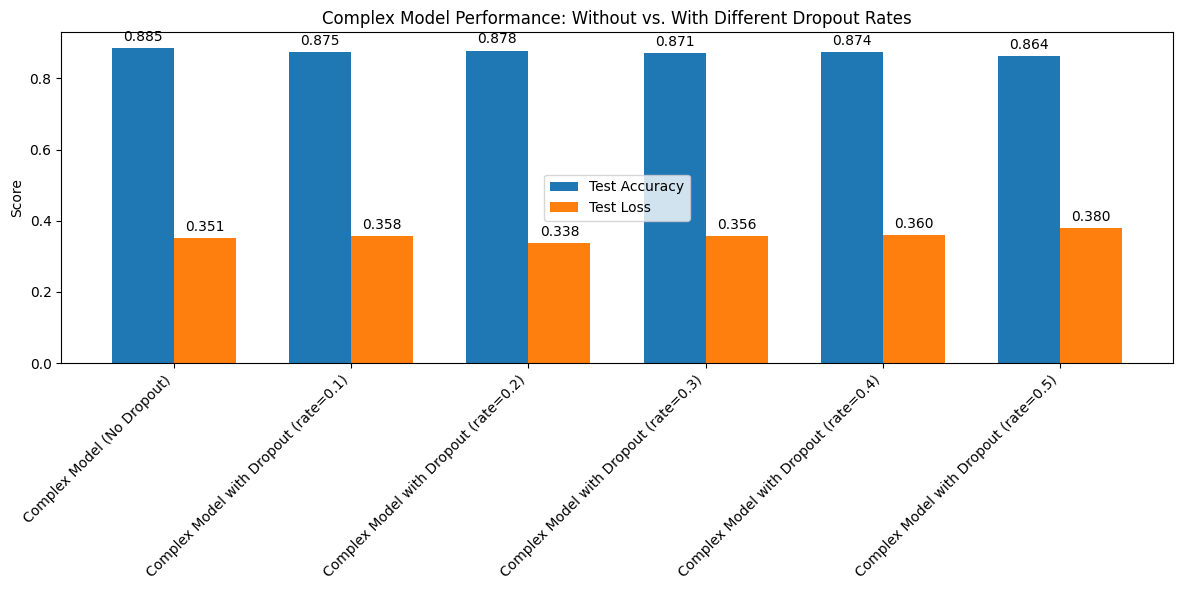

In [46]:
labels = list(results_dropout_comparison.keys())
test_accuracies = [data["test_acc"] for data in results_dropout_comparison.values()]
test_losses = [data["test_loss"] for data in results_dropout_comparison.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, test_accuracies, width, label='Test Accuracy')
rects2 = ax.bar(x + width/2, test_losses, width, label='Test Loss')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Complex Model Performance: Without vs. With Different Dropout Rates')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Adding convolutional and MaxPooling layers

In [47]:
def build_and_train_cnn_model(train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains a CNN model."""
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Reshape data to include channel dimension for CNN
    train_images_cnn = np.expand_dims(train_images, -1)
    test_images_cnn = np.expand_dims(test_images, -1)

    history = model.fit(train_images_cnn, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images_cnn, test_labels, verbose=0)

    return history, test_loss, test_acc

In this function:

  We define a Sequential model with two Conv2D layers and two MaxPooling2D layers.
  We use input_shape=(28, 28, 1) for the first convolutional layer to specify the image dimensions including the channel (1 for grayscale).
  We add a Flatten layer before the dense layers.
  Crucially, we reshape the training and testing images using np.expand_dims(..., -1) to add the channel dimension before feeding them to the CNN.

Next, let's train both the original dense model and the new CNN model and store their test accuracies. Add another new code cell:


In [48]:
results_cnn_comparison = {}

# Train the original dense model
print("Training the original dense model...")
_, _, test_acc_original = build_and_train_original_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_cnn_comparison["Original Dense Model"] = {
    "test_acc": test_acc_original,
}
print(f"Original Dense Model Test Accuracy: {test_acc_original}\n")

# Train the CNN model
print("Training the CNN model...")
_, _, test_acc_cnn = build_and_train_cnn_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_cnn_comparison["CNN Model"] = {
    "test_acc": test_acc_cnn,
}
print(f"CNN Model Test Accuracy: {test_acc_cnn}\n")

Training the original dense model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Dense Model Test Accuracy: 0.8823000192642212

Training the CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model Test Accuracy: 0.911899983882904



This code trains both models and stores only their final test accuracies in the results_cnn_comparison dictionary.

Plotting the results as barplots:


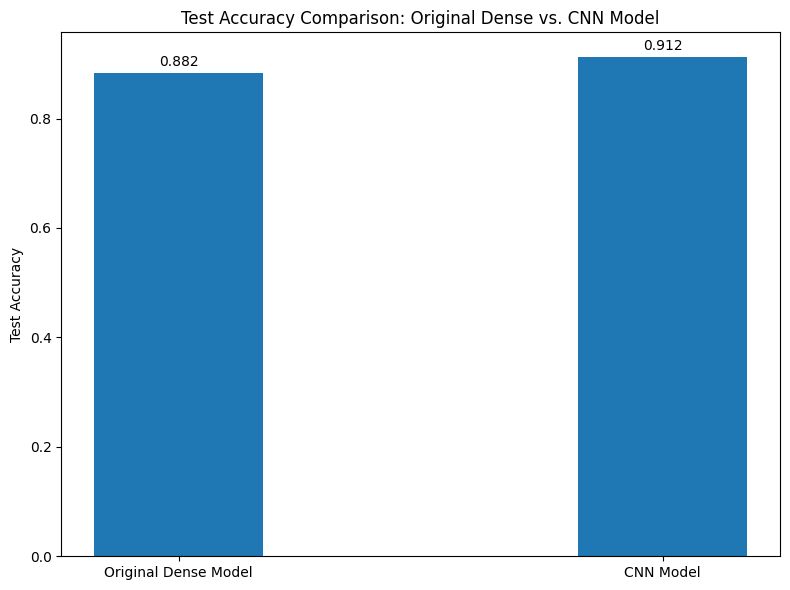

In [49]:
labels = list(results_cnn_comparison.keys())
test_accuracies = [data["test_acc"] for data in results_cnn_comparison.values()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects = ax.bar(x, test_accuracies, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy Comparison: Original Dense vs. CNN Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.3f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

fig.tight_layout()
plt.show()

# Adding dropout layers to the CNN

Function for the CNN model with dropout layers:

In [50]:
def build_and_train_cnn_model_with_dropout(dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10):
    """Builds and trains a CNN model with dropout layers."""
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout after first pooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout after second pooling
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),  # Add dropout before final dense layer
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Reshape data to include channel dimension for CNN
    train_images_cnn = np.expand_dims(train_images, -1)
    test_images_cnn = np.expand_dims(test_images, -1)

    history = model.fit(train_images_cnn, train_labels, epochs=epochs, verbose=0)

    test_loss, test_acc = model.evaluate(test_images_cnn, test_labels, verbose=0)

    return history, test_loss, test_acc

In this function, I've added tf.keras.layers.Dropout(dropout_rate) layers after each pooling layer and after the dense layer before the final output. You can adjust the dropout_rate and the positions of the dropout layers to experiment.

Training both CNN models and storing their results:


In [51]:
results_cnn_dropout_comparison = {}

# Train the CNN model without dropout
print("Training the CNN model without dropout...")
history_cnn_original, test_loss_cnn_original, test_acc_cnn_original = build_and_train_cnn_model(
    train_images, train_labels, test_images, test_labels, epochs=10
)
results_cnn_dropout_comparison["CNN Model (No Dropout)"] = {
    "history": history_cnn_original,
    "test_loss": test_loss_cnn_original,
    "test_acc": test_acc_cnn_original,
}
print(f"CNN Model (No Dropout) Test Accuracy: {test_acc_cnn_original}\n")

# Train the CNN model with dropout
dropout_rate = 0.3  # You can change this value
print(f"Training CNN model with dropout (rate={dropout_rate})...")
history_cnn_dropout, test_loss_cnn_dropout, test_acc_cnn_dropout = build_and_train_cnn_model_with_dropout(
    dropout_rate, train_images, train_labels, test_images, test_labels, epochs=10
)
results_cnn_dropout_comparison[f"CNN Model with Dropout (rate={dropout_rate})"] = {
    "history": history_cnn_dropout,
    "test_loss": test_loss_cnn_dropout,
    "test_acc": test_acc_cnn_dropout,
}
print(f"CNN Model with Dropout Test Accuracy: {test_acc_cnn_dropout}\n")

Training the CNN model without dropout...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model (No Dropout) Test Accuracy: 0.9079999923706055

Training CNN model with dropout (rate=0.3)...
CNN Model with Dropout Test Accuracy: 0.9043999910354614



This code will train both the CNN model without dropout and the CNN model with dropout (using a dropout_rate of 0.3 for now) and store their results in the results_cnn_dropout_comparison dictionary.

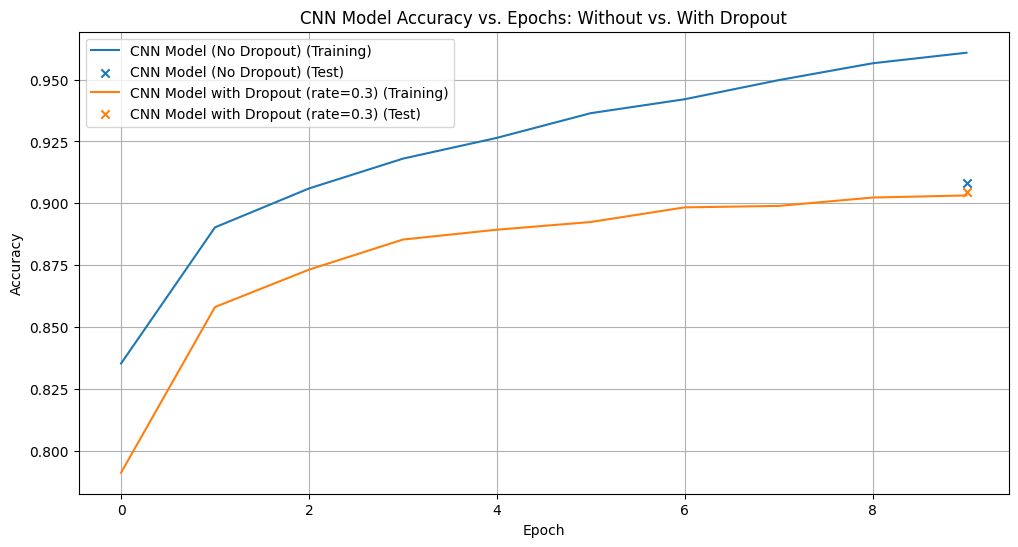

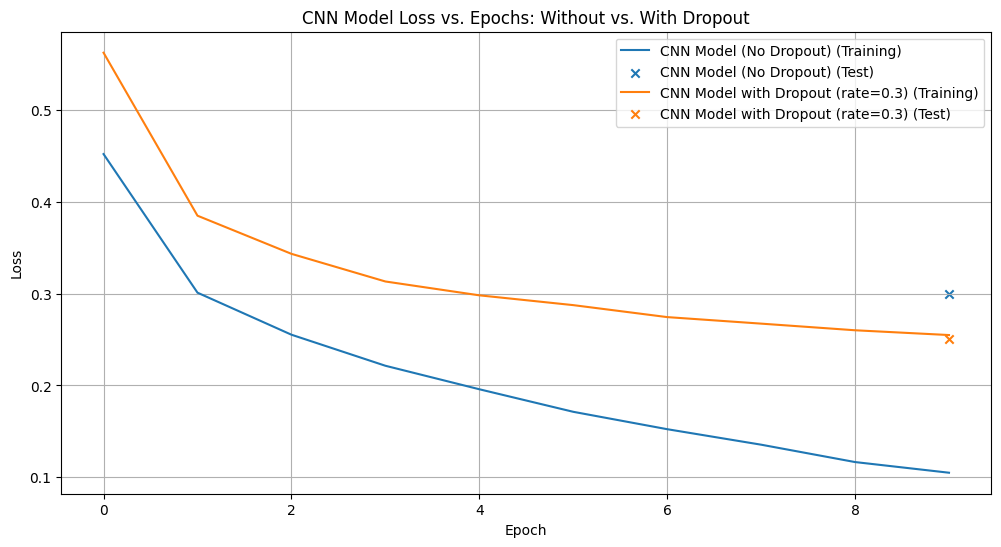

In [52]:
plt.figure(figsize=(12, 6))

for model_name, data in results_cnn_dropout_comparison.items():
    history = data["history"]
    plt.plot(history.history['accuracy'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_acc"], label=f'{model_name} (Test)', marker='x') # Mark test accuracy at last epoch

plt.title('CNN Model Accuracy vs. Epochs: Without vs. With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

for model_name, data in results_cnn_dropout_comparison.items():
    history = data["history"]
    plt.plot(history.history['loss'], label=f'{model_name} (Training)')
    plt.scatter(9, data["test_loss"], label=f'{model_name} (Test)', marker='x') # Mark test loss at last epoch

plt.title('CNN Model Loss vs. Epochs: Without vs. With Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()